In [ ]:
%pip install --upgrade pip

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Looking in indexes: http://pypi.data.internal, https://pypi.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [ ]:
%pip install --upgrade pymc pymc_marketing arviz pytensor
%pip install --upgrade jax jaxlib numpyro graphviz

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Looking in indexes: http://pypi.data.internal, https://pypi.org/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/41.3 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/55.8 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/470.1 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip install --upgrade jax jax[cuda11_cudnn82] jaxlib numpyro graphviz
%pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Looking in indexes: http://pypi.data.internal, https://pypi.org/simple
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Looking in indexes: http://pypi.data.internal, https://pypi.org/simple
Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/130.5 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/130.5 MB 2.0 MB/s eta 0:01:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/130.5 MB 2.0 MB/s eta 0:01:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/130.5 MB 511.5 kB/s eta 0:04:15
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/130.5 MB 558.6 kB/s eta 0:03:54
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/130.5 MB 558.6 kB

In [ ]:
dbutils.library.restartPython()

In [ ]:
#datasets/demo_hierarchical.csv

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime

import json

import arviz as az
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import scipy.stats as stats
from scipy.stats import (
    beta, 
    gaussian_kde,
    mode)

from scipy.spatial import distance
from scipy.stats import lognorm
from scipy.optimize import (
    Bounds, 
    curve_fit, 
    minimize, 
    fsolve,
    minimize_scalar)
import xarray as xr

from sympy import symbols, exp, solve

import os
import json
import math
import itertools

In [ ]:
import pymc as pm
from pymc.gp import cov, gp
import pytensor.tensor as tt
from pytensor import printing, scan

from pymc_marketing.mmm.transformers import geometric_adstock

In [ ]:
az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

In [ ]:
def hill_sigmoidal_saturation(x, sigma, beta, lam):
    """
    Compute the hill sigmoidal response curve.
    The function starts at 0 for x -> -infinity, increases rapidly depending on beta,
    and saturates at sigma for x -> +infinity. The transition point is controlled by lam.

    Parameters
    ----------
    x : float or array-like
        The independent variable.
    sigma : float
        The upper asymptote (maximum value the function will approach as x grows large).
    beta : float
        The growth rate.
    lam : float
        The x-value of the midpoint where the curve transitions from exponential growth to saturation.

    Returns
    -------
    float or array-like
        The computed y-values based on the sigmoidal response curve.
    """
    return sigma / (1 + np.exp(-beta * (x - lam)))

In [ ]:
df=pd.read_csv("demo_hierarchical.csv")

In [ ]:
df.info()
df.head(5)

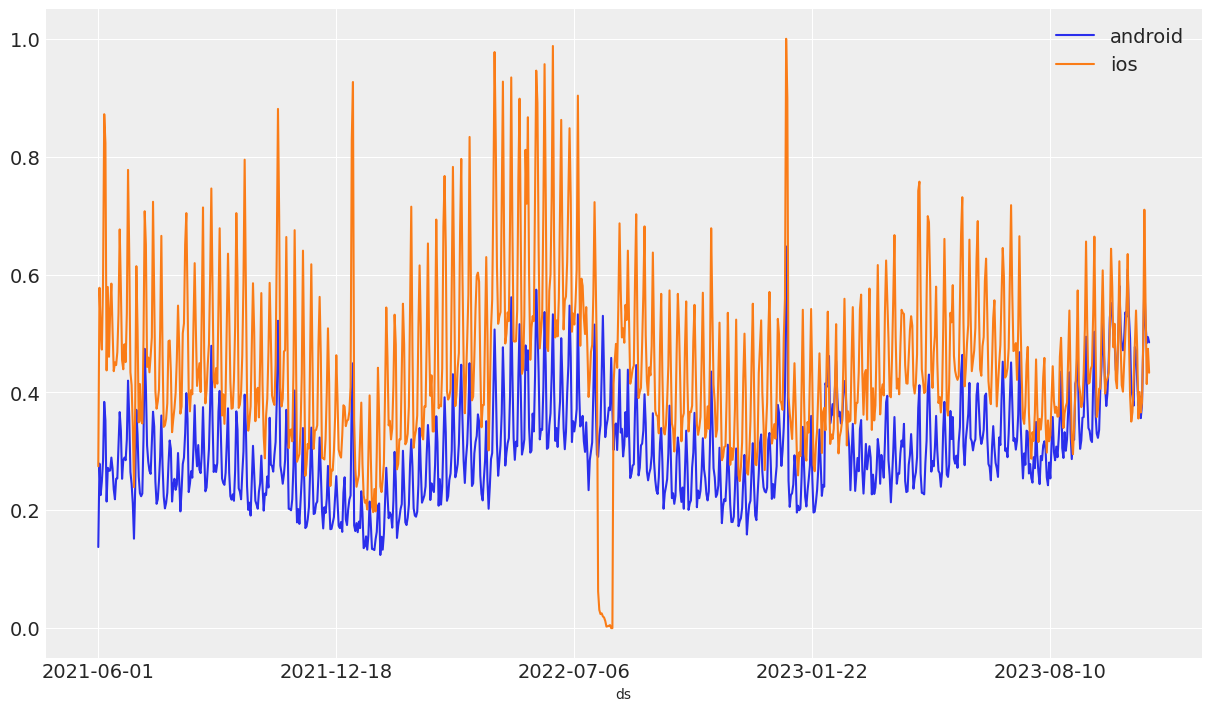

In [ ]:
df.query("os=='android'").set_index("ds")['y'].plot(label='android')
df.query("os=='ios'").set_index("ds")['y'].plot(label='ios')
plt.legend()

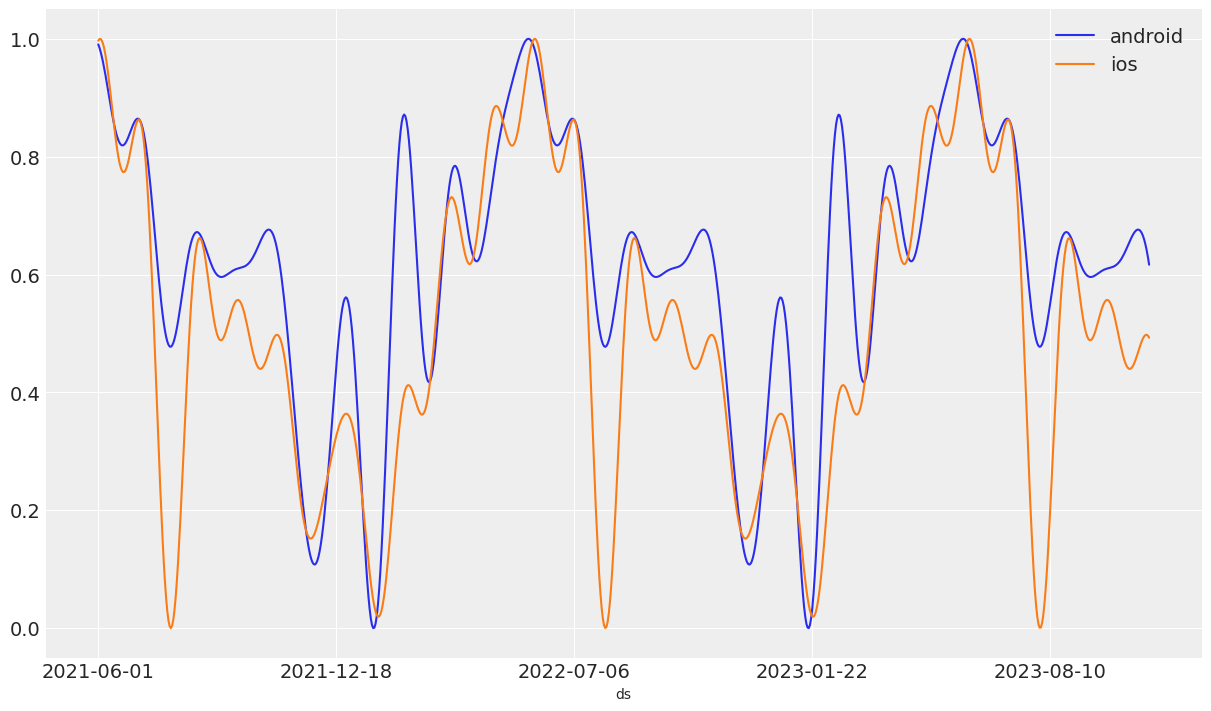

In [ ]:
df.query("os=='android'").set_index("ds")['yearly_android'].plot(label='android')
df.query("os=='ios'").set_index("ds")['yearly_ios'].plot(label='ios')
plt.legend()

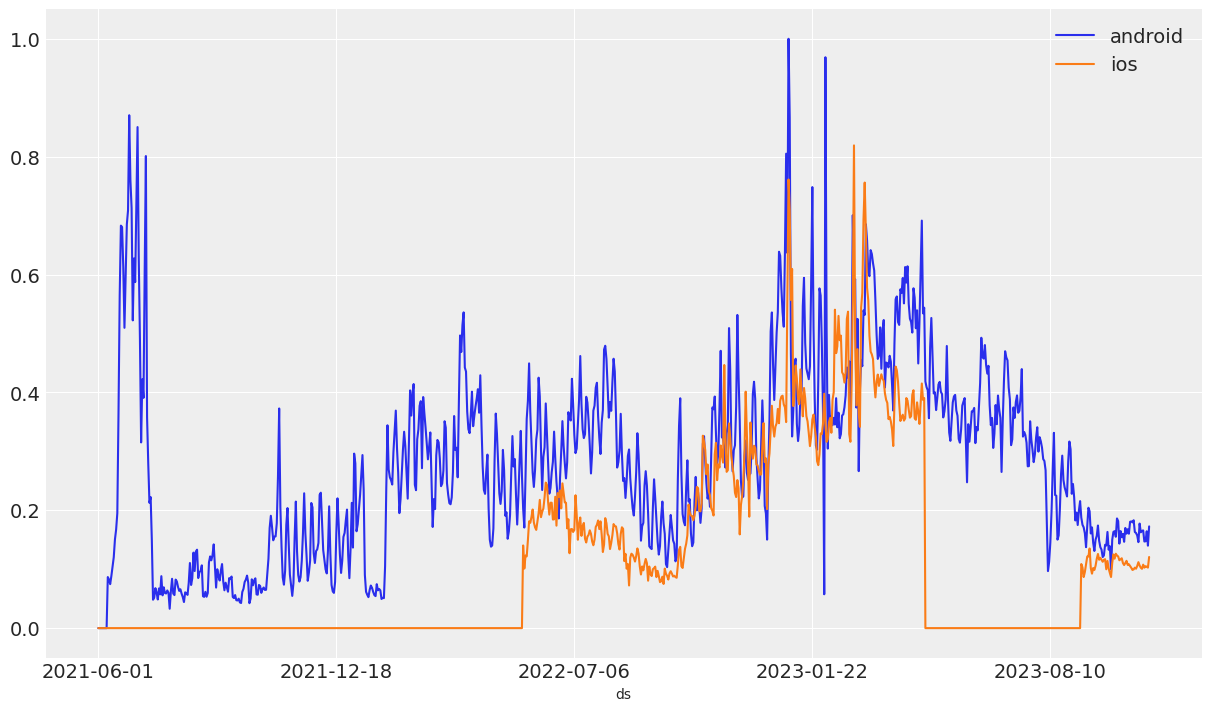

In [ ]:
df.query("os=='android'").set_index("ds")['channel_1'].plot(label='android')
df.query("os=='ios'").set_index("ds")['channel_1'].plot(label='ios')
plt.legend()

In [ ]:
channels = [
    "channel_1",
    "channel_2",
    "channel_3",
    "channel_4",
    "channel_5"
]

In [ ]:
controls = [
    "weekly_android",
    "weekly_ios",    
    "trend_android", 
    "trend_ios",    
    "yearly_ios",    
    "yearly_android"
]

In [ ]:
hierarchy_col = "os"
hierarchies = df[hierarchy_col].unique()
hierarchies

array(['ios', 'android'], dtype=object)

In [ ]:
dates = df.ds.unique()
dates

array(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
       '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
       '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
       '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
       '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
       '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
       '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
       '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
       '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
       '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
       '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
       '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
       '2021-07-31', '2021-08-01', '2021-08-02', '2021-

In [ ]:
n_hierarchies = len(hierarchies)
n_channels = len(channels)
n_dates = len(dates)
n_controls = len(controls)

max_lagging = 5

In [ ]:
X_data = xr.DataArray(np.empty((n_dates, n_channels, n_hierarchies)), 
                      coords={
                        "date": dates,
                        "channel": channels,
                        "hierarchy": hierarchies,
                      }, 
                      dims=['date', 'channel', 'hierarchy'])

# Populate it (assuming df is sorted by date)
for i, cat in enumerate(hierarchies):
    for j, ch in enumerate(channels):
        X_data.loc[dict(channel=ch, hierarchy=cat)] = df[df[hierarchy_col] == cat][ch].values

# To access specific values
X_data.values#.sel(channel='some_channel', category='some_category')

array([[[0.        , 0.        ],
        [0.02079495, 0.03574106],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.02233234, 0.03324651],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.02168435, 0.03118819],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       ...,

       [[0.10406988, 0.16429999],
        [0.        , 0.23513966],
        [0.3973819 , 0.        ],
        [0.34596875, 0.        ],
        [0.09762214, 0.        ]],

       [[0.10269615, 0.13993703],
        [0.        , 0.22375961],
        [0.38760891, 0.        ],
        [0.38555607, 0.        ],
        [0.06973627, 0.        ]],

       [[0.12067837, 0.17262487],
        [0.        , 0.23186159],
        [0.40044938, 0.        ],
        [0.4756521 , 0.  

In [ ]:
X_control = xr.DataArray(np.empty((n_dates, n_controls, n_hierarchies)), 
                         coords={
                        "date": dates,
                        "control": controls,
                        "hierarchy": hierarchies,
                      }, 
                      dims=['date', 'control', 'hierarchy']
                         )

# Populate it (assuming df is sorted by date)
for i, cat in enumerate(hierarchies):
    for j, ch in enumerate(controls):
        X_control.loc[dict(control=ch, hierarchy=cat)] = df[df[hierarchy_col] == cat][ch].values

# To access specific values
X_control.values

array([[[3.21157655e-01, 8.32556246e-13],
        [6.93778368e-13, 3.22553792e-01],
        [0.00000000e+00, 6.25944055e-01],
        [9.71914881e-01, 0.00000000e+00],
        [9.96830198e-01, 5.03373603e-01],
        [6.02139648e-01, 9.90529150e-01]],

       [[3.21157655e-01, 5.54471418e-02],
        [5.63106867e-02, 3.22553792e-01],
        [0.00000000e+00, 6.25916802e-01],
        [9.71997815e-01, 0.00000000e+00],
        [9.99621291e-01, 5.03373603e-01],
        [6.02139648e-01, 9.84789232e-01]],

       [[3.21157655e-01, 1.56458333e-01],
        [1.33291507e-01, 3.22553792e-01],
        [0.00000000e+00, 6.25889548e-01],
        [9.72080748e-01, 0.00000000e+00],
        [9.99687187e-01, 5.03373603e-01],
        [6.02139648e-01, 9.77760805e-01]],

       ...,

       [[3.21157655e-01, 2.42763222e-02],
        [3.30124327e-02, 3.22553792e-01],
        [0.00000000e+00, 9.96064714e-01],
        [9.50371350e-01, 0.00000000e+00],
        [4.97726813e-01, 5.03373603e-01],
        [6.0213

In [ ]:
def interaction_effect(df, channels):
    return df[channels].product(axis=1)

# Apply the interaction effect to each hierarchy and stack the results
X_interactions = np.stack([
    interaction_effect(df.query(f"{hierarchy_col} == '{hierarchy_name}'"), channels) for hierarchy_name in hierarchies
], axis=-1)

# Convert the numpy array to an xarray DataArray
X_interactions = xr.DataArray(X_interactions, 
                                 coords={"date":dates, "hierarchy": hierarchies}, 
                                 dims=['date', 'hierarchy']
                                 )
X_interactions.values

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# Initialize an empty DataArray for y
y = xr.DataArray(np.empty((n_dates, n_hierarchies)), 
                 coords={
                     "date": dates,
                     "hierarchy": hierarchies,
                 }, 
                 dims=['date', 'hierarchy']
                )

# Populate y
for hierarchy_name in hierarchies:
    y.loc[dict(hierarchy=hierarchy_name)] = df[df[hierarchy_col] == hierarchy_name]['y'].values

y.values

array([[0.27459807, 0.13762058],
       [0.57749196, 0.27909968],
       [0.50546624, 0.22572347],
       ...,
       [0.41414791, 0.48360129],
       [0.47395498, 0.49389068],
       [0.43344051, 0.48488746]])

In [ ]:
coords = {
    "date": dates,
    "channel": channels,
    "hierarchy": hierarchies,
    "control":controls,
}

In [ ]:
# PyMC Model
with pm.Model(coords=coords) as installs_model:
    #Load Data
    channel_data = pm.MutableData(
        name="channel_data",
        value=X_data.values,
        dims=("date", "channel", "hierarchy")
    )

    channel_data_interaction = pm.MutableData(
        name="channel_data_interaction",
        value=X_interactions,
        dims=("date", "hierarchy")
    )

    control_data = pm.MutableData(
        name="control_data",
        value=X_control.values,
        dims=("date", "control", "hierarchy")
    )

    target_y = pm.MutableData(
        name="target_y",
        value=y.values,
        dims=("date", "hierarchy")
    )

    #intercept
    prior_intercept = pm.find_constrained_prior(
        pm.LogNormal, lower=0.1, upper=0.9, init_guess={"mu": 0.5, "sigma": 0.5}
    )
    intercept = pm.LogNormal('intercept', **prior_intercept, dims=("hierarchy"))

    #adstock effect (Lagging)
    prior_alpha_adstock = pm.find_constrained_prior(
        pm.LogNormal, lower=0.1, upper=0.3, init_guess={"mu": 0.2, "sigma": 1}
    )
    mu_alpha = pm.HalfNormal(name="mu_alpha",sigma=2)
    sigma_alpha = pm.HalfNormal(name="sigma_alpha",sigma=1)
    
    #offset estimated based on Thomas example about non-centered (https://twiecki.io/blog/2017/02/08/bayesian-hierchical-non-centered/)
    alpha_prior_offset = pm.LogNormal(
        'alpha_prior_offset', 
        **prior_alpha_adstock,
        dims=("channel", "hierarchy")
        )
    
    alpha_adstock = pm.Deterministic("alpha_adstock", 
                                    var=mu_alpha + alpha_prior_offset * sigma_alpha, 
                                    dims=("channel", "hierarchy")
                                    )

    _adstock = pm.Deterministic(
        'adstock_contribution',
        var = geometric_adstock(
            x=channel_data, 
            alpha=alpha_adstock, 
            l_max=max_lagging,
            normalize=True),
        dims=("date", "channel", "hierarchy")
    )

    ## Saturation Effects.
    # sigma
    sigma_saturation_params = pm.find_constrained_prior(
        pm.LogNormal, lower=0.01, upper=0.1, init_guess={"mu": 0.05, "sigma": 0.5}
    )
    sigma_saturation_offset = pm.LogNormal('sigma_saturation_offset', 
                         **sigma_saturation_params,
                         shape=(n_channels, n_hierarchies), 
                         dims=("channel", "hierarchy")
                         )
    mu_sigma_saturation = pm.HalfNormal(name="mu_sigma_saturation",sigma=2)
    sigma_sigma_saturation = pm.HalfNormal(name="sigma_sigma_saturation",sigma=1)

    sigma_saturation = pm.Deterministic("sigma_saturation", 
                                    var=mu_sigma_saturation + sigma_saturation_offset * sigma_sigma_saturation, 
                                    dims=("channel", "hierarchy")
                                    )

    # lam
    lam_saturation_params = pm.find_constrained_prior(
        pm.LogNormal, lower=0.1, upper=2, init_guess={"mu": 0.5, "sigma": 1}
    )
    lam_saturation_offset = pm.LogNormal('lam_saturation_offset', 
                       **lam_saturation_params,
                       shape=(n_channels, n_hierarchies), 
                       dims=("channel", "hierarchy")
                       )
    mu_lam_saturation = pm.HalfNormal(name="mu_lam_saturation",sigma=2)
    sigma_lam_saturation = pm.HalfNormal(name="sigma_lam_saturation",sigma=1)

    lam_saturation = pm.Deterministic("lam_saturation", 
                                    var=mu_lam_saturation + lam_saturation_offset * sigma_lam_saturation, 
                                    dims=("channel", "hierarchy")
                                    )

    #beta
    beta_saturation_params = pm.find_constrained_prior(
        pm.LogNormal, lower=0.01, upper=0.1, init_guess={"mu": 0.05, "sigma": 0.5}
    )
    beta_saturation_offset = pm.LogNormal('beta_saturation_offset', 
                        **beta_saturation_params,
                        shape=(n_channels, n_hierarchies), 
                        dims=("channel", "hierarchy")
                        )
    mu_beta_saturation = pm.HalfNormal(name="mu_beta_saturation",sigma=2)
    sigma_beta_saturation = pm.HalfNormal(name="sigma_beta_saturation",sigma=1)

    beta_saturation = pm.Deterministic("beta_saturation", 
                                    var=mu_beta_saturation + beta_saturation_offset * sigma_beta_saturation, 
                                    dims=("channel", "hierarchy")
                                    )
    
    saturated_adstock = pm.Deterministic(
        'saturated_adstock',
        var=hill_sigmoidal_saturation(x=_adstock, 
                                sigma=sigma_saturation, 
                                beta=beta_saturation, 
                                lam=lam_saturation), 
        dims=("date", "channel", "hierarchy")
    )

    #Channel contributions
    beta_channel_params = pm.find_constrained_prior(
        pm.LogNormal, lower=0.1, upper=0.8, init_guess={"mu": 0.3, "sigma": 0.5}
    )
    beta_channel_offset = pm.LogNormal('beta_channel_offset', 
                                **beta_channel_params, 
                                shape=(n_channels, n_hierarchies), 
                                dims=("channel", "hierarchy")
                                )
    mu_beta_channel = pm.HalfNormal(name="mu_beta_channel",sigma=3)
    sigma_beta_channel = pm.HalfNormal(name="sigma_beta_channel",sigma=1)

    #Probably has beta is probably too much and perhaps redundant based on hill's specifications.
    beta_channel = pm.Deterministic("beta_channel", 
                                    var=mu_beta_channel + beta_channel_offset * sigma_beta_channel, 
                                    dims=("channel", "hierarchy")
                                    )

    contribution = pm.Deterministic(
        'contribution',
        var=(saturated_adstock * beta_channel),
        dims=("date", "channel", "hierarchy")
    )

    #control contribution
    beta_control_params = pm.find_constrained_prior(
        pm.Normal, lower=0.1, upper=0.8, init_guess={"mu": 0.3, "sigma": 0.5}
    )
    beta_control = pm.Normal('beta_control', 
                            **beta_control_params, 
                            shape=(n_controls, n_hierarchies), 
                            dims=("control", "hierarchy")
                            )

    control_contribution = pm.Deterministic(
        'control_contribution',
        var = (control_data * beta_control),
        dims=("date", "control", "hierarchy")
    )

    #Priors for interaction effects
    beta_interaction_params = pm.find_constrained_prior(
        pm.Normal, lower=0.1, upper=0.8, init_guess={"mu": 0.3, "sigma": 0.5}
    )
    beta_interaction = pm.Normal('beta_interaction', 
                                **beta_interaction_params, 
                                shape=(n_hierarchies,), 
                                dims=("hierarchy")
                                )

    # Adding interaction effects to the model
    interaction_effects = pm.Deterministic(
        'interaction_effects',
        var = (channel_data_interaction * beta_interaction),
        dims=("date", "hierarchy")
    )

    mu_var = (
        intercept[..., None] + 
        contribution.sum(axis=1)[..., None] +
        interaction_effects[..., None] +
        control_contribution.sum(axis=1)[..., None]
        ).sum(axis=-1)

    sigma_likelihood = pm.HalfNormal("sigma_likelihood", sigma=2, dims="hierarchy")
    nu = pm.Gamma(name="nu", alpha=4, beta=2, dims="hierarchy")
    
    #
    pm.StudentT(
            name="likelihood", 
            mu=mu_var, 
            nu=nu, 
            sigma=sigma_likelihood, 
            dims=("date", "hierarchy"), observed=target_y
        )
    
    prior_predictive = pm.sample_prior_predictive()

Sampling: [alpha_prior_offset, beta_channel_offset, beta_control, beta_interaction, beta_saturation_offset, intercept, lam_saturation_offset, likelihood, mu_alpha, mu_beta_channel, mu_beta_saturation, mu_lam_saturation, mu_sigma_saturation, nu, sigma_alpha, sigma_beta_channel, sigma_beta_saturation, sigma_lam_saturation, sigma_likelihood, sigma_saturation_offset, sigma_sigma_saturation]


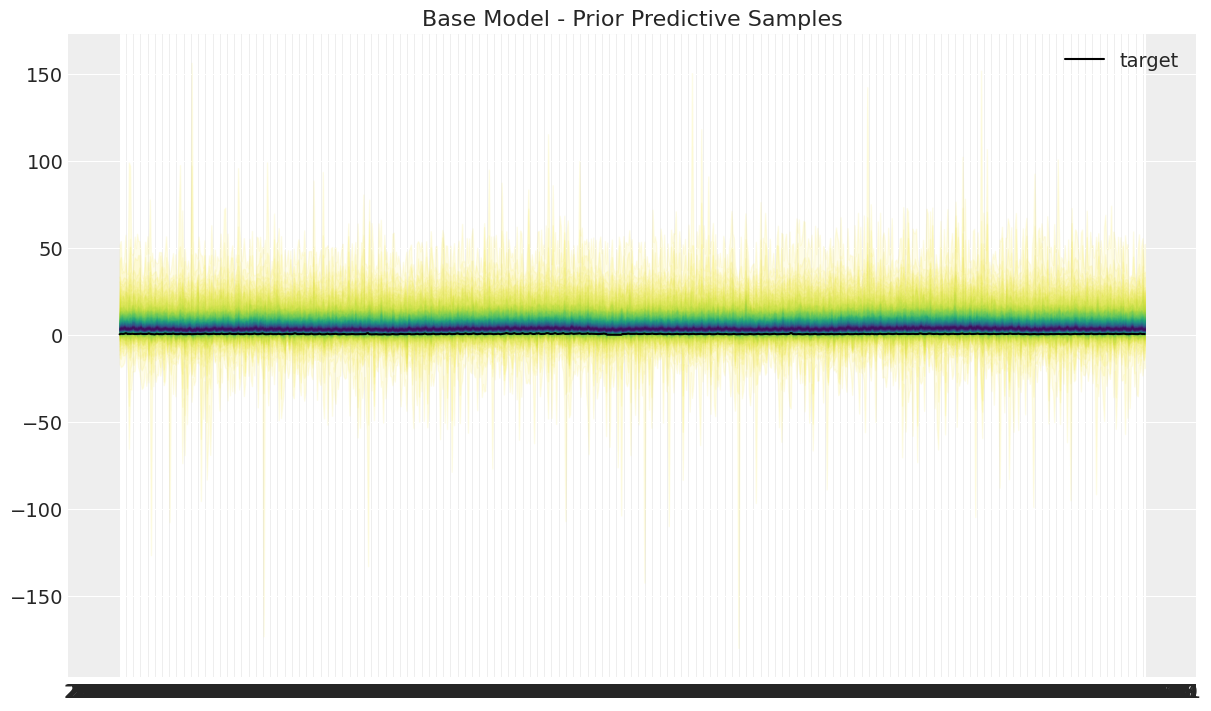

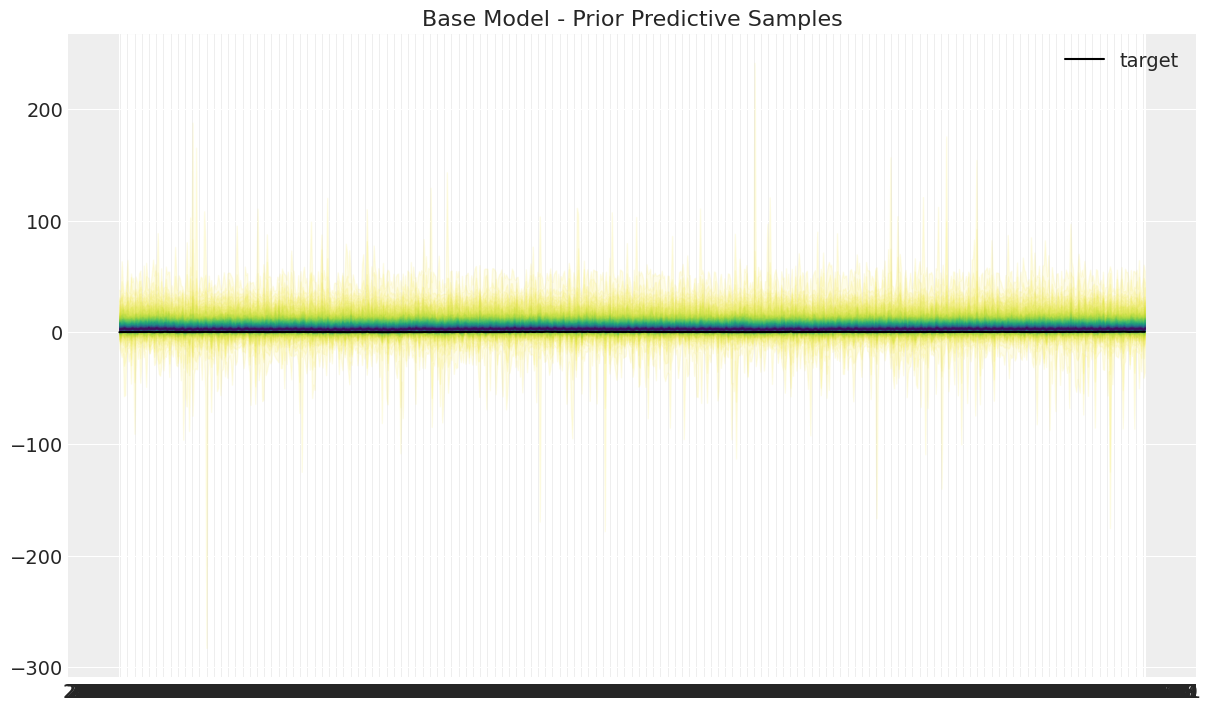

In [ ]:
# useful way to color the distribution
palette = "viridis_r"
cmap = plt.get_cmap(palette)
percs = np.linspace(51, 99, 100)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))

for i, hierarchy_name in enumerate(hierarchies):
    likelihood = prior_predictive.prior_predictive["likelihood"].sel(hierarchy=hierarchy_name)

    fig, ax = plt.subplots()

    for i, p in enumerate(percs[::-1]):
        upper = np.percentile(likelihood, p, axis=1)
        lower = np.percentile(
            likelihood, 100 - p, axis=1
        )
        color_val = colors[i]
        ax.fill_between(
            x=dates,
            y1=upper.flatten(),
            y2=lower.flatten(),
            color=cmap(color_val),
            alpha=0.1,
        )

    sns.lineplot(x=dates, 
                 y=y.sel(hierarchy=hierarchy_name), color="black", 
                 label="target", ax=ax)
    ax.legend()
    ax.set(title="Base Model - Prior Predictive Samples")
    plt.show()

In [ ]:
with installs_model:
    start = pm.find_MAP()
    trace = pm.sample(
      draws=3000, 
      tune=2000, 
      target_accept=0.98, 
      chains=4, 
      initvals=start,
      nuts_sampler='numpyro', 
      nuts_sampler_kwargs={"chain_method":"vectorized"},
      idata_kwargs={"log_likelihood": True},
                    )
    posterior_predictive = pm.sample_posterior_predictive(trace=trace, progressbar=True)

 |█------

*** WARNING: max output size exceeded, skipping output. ***

 |███████████████████████████████| 100.00% [1505/1505 00:05<00:00 logp = 2,561.8, ||grad|| = 1.2949]


Compiling...
Compilation time = 0:00:17.217744
Sampling...
warmup:   9%|▊ 

*** WARNING: max output size exceeded, skipping output. ***

sample: 100%|██████████| 5000/5000 [22:37<00:00,  3.68it/s]
Sampling time = 0:22:53.884249
Transforming variables...
Transformation time = 0:00:04.405896
Computing Log Likelihood...
Log Likelihood time = 0:00:01.946359


Sampling: [likelihood]


In [ ]:
trace["sample_stats"]["diverging"].sum().item()

0

In [ ]:
# Show summary statistics of the trace
az.summary(
    data = trace,
    var_names=['intercept',
               'alpha_adstock',
               ]
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept[ios],0.105,0.004,0.098,0.112,0.00,0.000,20972.0,8905.0,1.0
intercept[android],0.104,0.004,0.097,0.111,0.00,0.000,20622.0,9145.0,1.0
"alpha_adstock[google_impressions, ios]",0.603,0.826,0.002,2.175,0.01,0.007,8802.0,8975.0,1.0
"alpha_adstock[google_impressions, android]",0.603,0.825,0.002,2.178,0.01,0.007,8800.0,8975.0,1.0
"alpha_adstock[facebook_impressions, ios]",0.603,0.826,0.002,2.177,0.01,0.007,8796.0,8975.0,1.0
"alpha_adstock[facebook_impressions, android]",0.603,0.826,0.002,2.178,0.01,0.007,8808.0,8975.0,1.0
"alpha_adstock[tiktok_impressions, ios]",0.603,0.826,0.002,2.182,0.01,0.007,8813.0,8975.0,1.0
"alpha_adstock[tiktok_impressions, android]",0.603,0.826,0.003,2.177,0.01,0.007,8808.0,8999.0,1.0
"alpha_adstock[snapchat_impressions, ios]",0.603,0.825,0.002,2.178,0.01,0.007,8807.0,8999.0,1.0
"alpha_adstock[snapchat_impressions, android]",0.603,0.826,0.002,2.175,0.01,0.007,8809.0,8975.0,1.0


In [ ]:
# Show summary statistics of the trace
az.summary(
    data = trace,
    var_names=['beta_channel', 
               'beta_interaction'
               ]
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"beta_channel[google_impressions, ios]",1.013,1.166,0.019,3.308,0.012,0.008,9467.0,9372.0,1.0
"beta_channel[google_impressions, android]",1.012,1.166,0.018,3.307,0.012,0.008,9352.0,8974.0,1.0
"beta_channel[facebook_impressions, ios]",1.013,1.165,0.019,3.304,0.012,0.008,9368.0,9380.0,1.0
"beta_channel[facebook_impressions, android]",1.013,1.165,0.018,3.306,0.012,0.008,9437.0,9141.0,1.0
"beta_channel[tiktok_impressions, ios]",1.013,1.165,0.018,3.309,0.012,0.008,9341.0,9624.0,1.0
"beta_channel[tiktok_impressions, android]",1.013,1.166,0.017,3.300,0.012,0.008,9345.0,9646.0,1.0
"beta_channel[snapchat_impressions, ios]",1.012,1.165,0.018,3.300,0.012,0.008,9421.0,9192.0,1.0
"beta_channel[snapchat_impressions, android]",1.013,1.165,0.018,3.308,0.012,0.008,9350.0,9342.0,1.0
"beta_channel[apple_nonbrand_impressions, ios]",1.012,1.165,0.018,3.305,0.012,0.008,9360.0,9592.0,1.0
"beta_channel[apple_nonbrand_impressions, android]",1.013,1.165,0.019,3.304,0.012,0.008,9371.0,9589.0,1.0


In [ ]:
# Show summary statistics of the trace
az.summary(
    data = trace,
    var_names=[
        'sigma_saturation',
        'lam_saturation',
        'beta_saturation'
    ]
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"sigma_saturation[google_impressions, ios]",0.352,0.489,0.009,1.181,0.006,0.005,7835.0,8607.0,1.0
"sigma_saturation[google_impressions, android]",0.352,0.489,0.010,1.182,0.006,0.005,7865.0,8607.0,1.0
"sigma_saturation[facebook_impressions, ios]",0.352,0.489,0.009,1.179,0.006,0.005,7881.0,8521.0,1.0
"sigma_saturation[facebook_impressions, android]",0.352,0.489,0.010,1.180,0.006,0.005,7879.0,8607.0,1.0
"sigma_saturation[tiktok_impressions, ios]",0.352,0.489,0.009,1.181,0.006,0.005,7920.0,8607.0,1.0
"sigma_saturation[tiktok_impressions, android]",0.352,0.489,0.010,1.181,0.006,0.005,7844.0,8607.0,1.0
"sigma_saturation[snapchat_impressions, ios]",0.352,0.489,0.009,1.179,0.006,0.005,7890.0,8521.0,1.0
"sigma_saturation[snapchat_impressions, android]",0.352,0.489,0.009,1.181,0.006,0.005,7856.0,8607.0,1.0
"sigma_saturation[apple_nonbrand_impressions, ios]",0.352,0.489,0.008,1.179,0.006,0.005,7838.0,8607.0,1.0
"sigma_saturation[apple_nonbrand_impressions, android]",0.352,0.489,0.007,1.179,0.006,0.005,7916.0,8607.0,1.0


In [ ]:
# Show summary statistics of the trace
az.summary(
    data = trace,
    var_names=['beta_control'
               ]
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"beta_control[weekly_android, ios]",0.277,0.107,0.076,0.476,0.001,0.001,18504.0,8589.0,1.0
"beta_control[weekly_android, android]",0.133,0.005,0.124,0.142,0.000,0.000,24124.0,8857.0,1.0
"beta_control[weekly_ios, ios]",0.250,0.007,0.237,0.263,0.000,0.000,21570.0,8728.0,1.0
"beta_control[weekly_ios, android]",-0.056,0.097,-0.236,0.126,0.001,0.001,12028.0,8662.0,1.0
"beta_control[trend_android, ios]",0.612,0.115,0.407,0.837,0.001,0.001,22647.0,8723.0,1.0
"beta_control[trend_android, android]",0.439,0.020,0.402,0.477,0.000,0.000,16521.0,8830.0,1.0
"beta_control[trend_ios, ios]",0.062,0.056,-0.046,0.166,0.001,0.001,10193.0,5501.0,1.0
"beta_control[trend_ios, android]",0.611,0.116,0.399,0.835,0.001,0.001,21321.0,8659.0,1.0
"beta_control[yearly_ios, ios]",0.214,0.009,0.196,0.232,0.000,0.000,10269.0,5672.0,1.0
"beta_control[yearly_ios, android]",-0.430,0.065,-0.548,-0.304,0.001,0.000,11694.0,7270.0,1.0


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

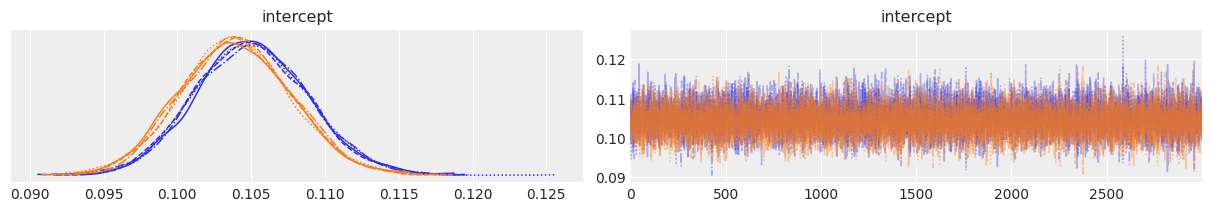

In [ ]:
az.plot_trace(
    data = trace,
    var_names=['intercept',
    ]
)

array([[<Axes: title={'center': 'beta_channel'}>,
        <Axes: title={'center': 'beta_channel'}>],
       [<Axes: title={'center': 'beta_interaction'}>,
        <Axes: title={'center': 'beta_interaction'}>]], dtype=object)

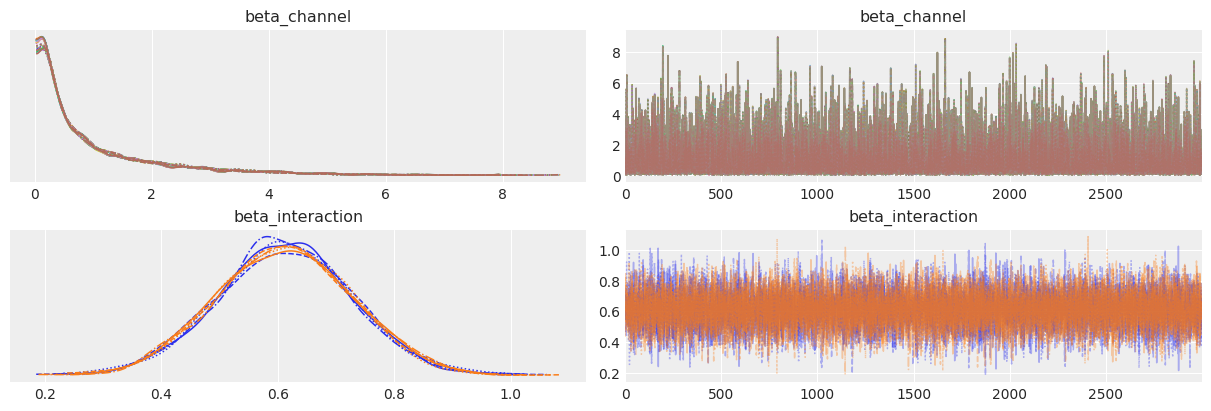

In [ ]:
az.plot_trace(
    data = trace,
    var_names=['beta_channel', 
               'beta_interaction'
               ]
)

array([[<Axes: title={'center': 'beta_control'}>,
        <Axes: title={'center': 'beta_control'}>]], dtype=object)

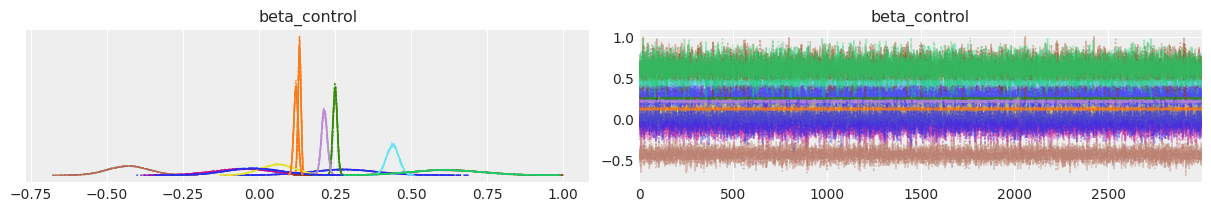

In [ ]:
az.plot_trace(
    data = trace,
    var_names=['beta_control'
               ]
)

array([[<Axes: title={'center': 'sigma_saturation'}>,
        <Axes: title={'center': 'sigma_saturation'}>],
       [<Axes: title={'center': 'lam_saturation'}>,
        <Axes: title={'center': 'lam_saturation'}>],
       [<Axes: title={'center': 'beta_saturation'}>,
        <Axes: title={'center': 'beta_saturation'}>]], dtype=object)

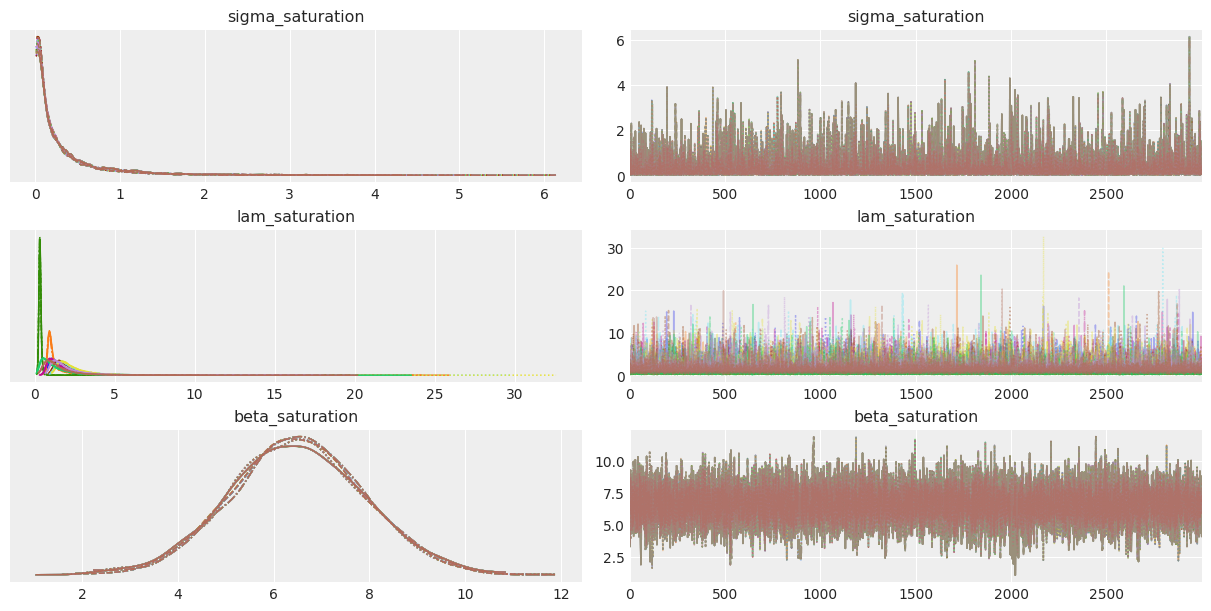

In [ ]:
az.plot_trace(
    data = trace,
    var_names=[
        'sigma_saturation',
        'lam_saturation',
        'beta_saturation'
    ]
)

In [ ]:
# Initialize an empty dictionary
_likelihoods = {}

# Loop over os types
for hierarchy_name in hierarchies:
    # Select posterior predictive likelihood for the os type
    likelihood = posterior_predictive['posterior_predictive']['likelihood'].sel(hierarchy=hierarchy_name)
    # Save likelihood to dictionary
    _likelihoods[hierarchy_name] = likelihood

_likelihoods

{'ios': <xarray.DataArray 'likelihood' (chain: 4, draw: 3000, date: 884)>
 array([[[0.24531306, 0.50953399, 0.34209652, ..., 0.41627909,
          0.40174698, 0.19139771],
         [0.39827116, 0.43404061, 0.51679466, ..., 0.26436632,
          0.41797665, 0.35333357],
         [0.45337706, 0.35759881, 0.50590857, ..., 0.40464715,
          0.32016912, 0.41979353],
         ...,
         [0.41941759, 0.45563857, 0.44072298, ..., 0.35731201,
          0.41901152, 0.46656065],
         [0.68342908, 0.51326366, 0.46741806, ..., 0.31407019,
          0.37128856, 0.58481056],
         [0.46987336, 0.54460249, 0.49621856, ..., 0.37595038,
          0.46946591, 0.33421559]],
 
        [[0.47937183, 0.51814633, 0.500127  , ..., 0.42294981,
          0.38994959, 0.36039298],
         [0.46685783, 0.49984541, 0.43384492, ..., 0.27338252,
          0.37063865, 0.38818941],
         [0.36061405, 0.40001106, 0.52741501, ..., 0.36394165,
          0.26605989, 0.36022924],
 ...
         [0.4754485 , 

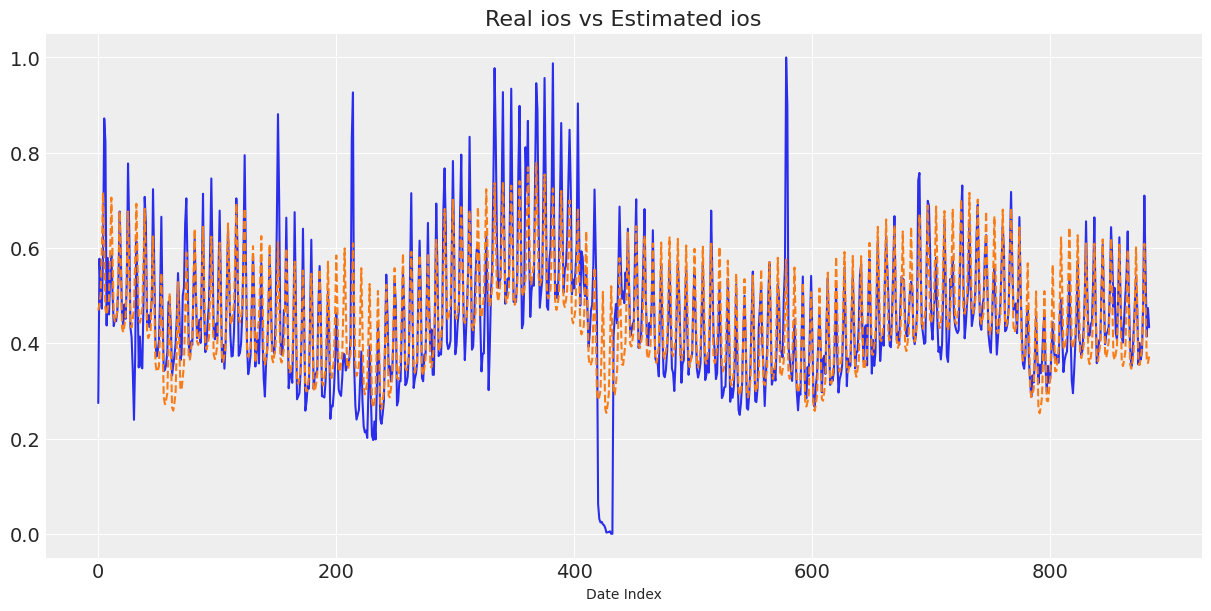

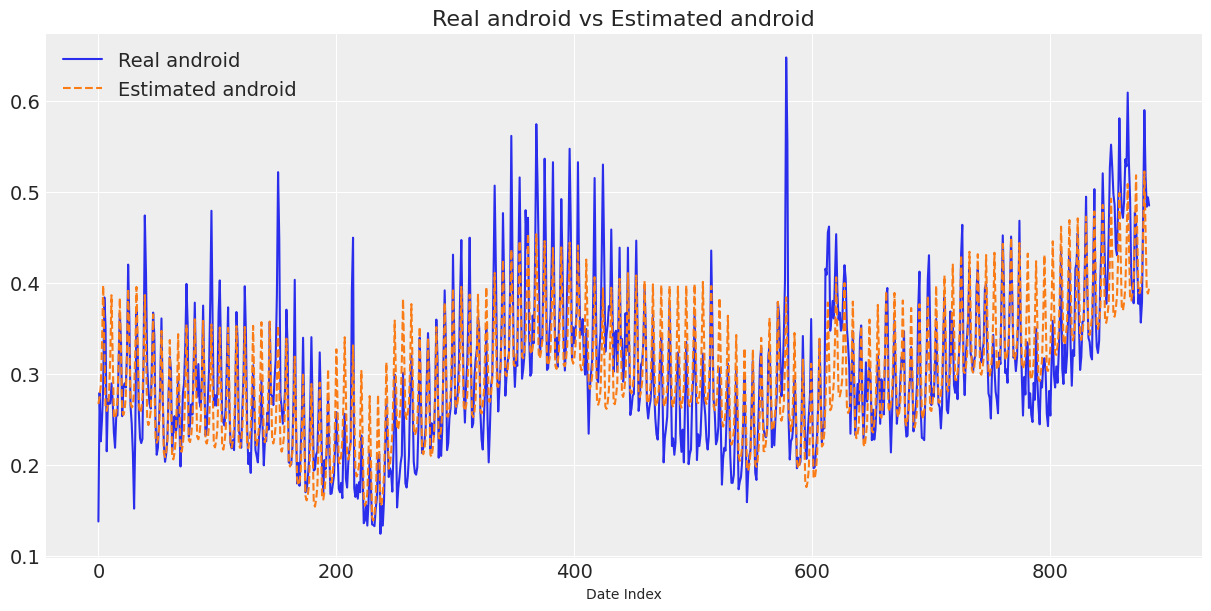

In [ ]:

for indexes, likelihood_name in enumerate(_likelihoods.keys()):
    y_estimated = _likelihoods[likelihood_name].stack(sample=("chain", "draw")).quantile(0.50, dim='sample')

    # Prepare data
    y_real = y[:, indexes]  # Replace this with your actual 'y' values

    # Plotting
    plt.figure(figsize=(12, 6))
    #figure
    plt.plot(y_real, label=f'Real {likelihood_name}', linestyle='-', )
    plt.plot(y_estimated, label=f'Estimated {likelihood_name}', linestyle='--', )

    #labels
    plt.xlabel('Date Index')
    plt.title(f'Real {likelihood_name} vs Estimated {likelihood_name}')

plt.legend()
plt.show()

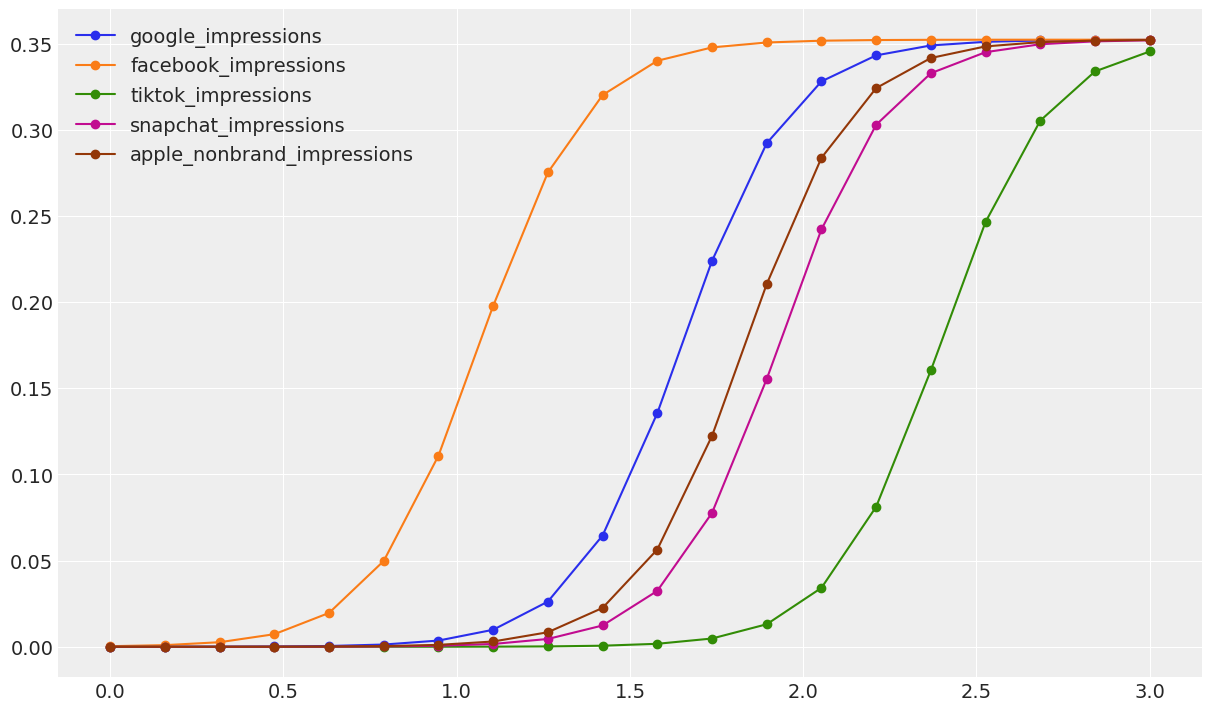

In [ ]:

X = np.linspace(0,3,20)
# Loop through each channel and plot
for channel in channels:
    # Create y values
    Y = hill_sigmoidal_saturation(
        X, 
        float(trace["posterior"]["sigma_saturation"].sel(channel=channel).mean()),
        float(trace["posterior"]["beta_saturation"].sel(channel=channel).mean()),
        float(trace["posterior"]["lam_saturation"].sel(channel=channel).mean())
    )

    # Create scatterplot
    plt.plot(X, Y, label=channel, marker='o')

# Show legend and plot
plt.legend()
plt.show()